In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
df=pd.read_excel("./表单2-处理1.xlsx")
df=df.fillna(0)
df=pd.get_dummies(df,columns=["类型"])
df=df.rename(columns={'类型_铅钡':'铅钡'})
df

,文物编号,文物采样点,红,蓝,绿,纹饰_A,纹饰_B,纹饰_C,风化与否,氧化钠(Na2O),...,氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),铅钡,类型_高钾
0,1,01,0,1,1,0,0,1,0,0.00,...,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,0,1
1,2,02,0,1,0,1,0,0,1,0.00,...,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,1,0
2,3,03部位1,0,1,1,1,0,0,0,0.00,...,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,0,1
3,3,03部位2,0,1,1,1,0,0,0,0.00,...,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,0,1
4,4,04,0,1,1,1,0,0,0,0.00,...,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,54,54,0,1,0,0,0,1,1,0.00,...,0.00,0.83,55.46,7.04,4.24,0.88,0.0,0.00,1,0
59,54,54严重风化点,0,1,0,0,0,1,2,0.00,...,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,1,0
60,55,55,0,0,0,0,0,1,0,2.71,...,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,1,0
61,56,56,0,1,1,0,0,1,1,0.00,...,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,1,0


In [3]:
data=df.iloc[:,2:22]
target=df["铅钡"]
random=2
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.2,random_state=random)
clf = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=random,#随机数种子
    splitter="best",
    max_depth=3,  # 树的最大深度，防止过拟合
    min_samples_leaf=15,  #叶节点所需要的最小样本数
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

1.0

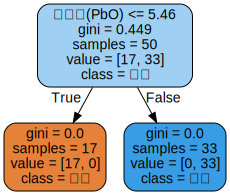

In [4]:
import graphviz

feature_name = data.columns

dot_data = tree.export_graphviz(
    clf,
    feature_names=feature_name,
    class_names=["高钾","铅钡"],
    filled=True,  # 是否填充颜色
    rounded=True,  # 每一块的边框为弧形
)
graph = graphviz.Source(dot_data)
graph

In [5]:
pd.DataFrame(clf.feature_importances_,index=data.columns)

,0
红,0.0
蓝,0.0
绿,0.0
纹饰_A,0.0
纹饰_B,0.0
纹饰_C,0.0
风化与否,0.0
氧化钠(Na2O),0.0
氧化钾(K2O),0.0
氧化钙(CaO),0.0
